# Supernova Signal - 3
Investigate different sampling

```
Created : June 2021
Last Update : 02-09-2021
Melih Kara kara@kit.edu
Ricardo Peres
```

## Table of Contents
- [2D Rates](#rates)
- [Plotting](#plot-data)
    - [Recoil Energy Spectrum 1D](#recoil-spec2D)
    - [Recoil Energy Spectrum 2D](#recoil-spec2D)

# Read model and 2D recoil rates<a class="anchor" id="rates"></a>

In [1]:
# allows to import from the parent directory
import sys; sys.path.append('../')

from snx import *
from snx.SN_plotter import Plotter
from snx.Supernova_Models import SN_lightcurve

2022-03-08 11:58:17,062 - utilix - WARNING - Could not load a configuration file. You can create one at /home/frazer/.xenon_config, or set a custom path using

export XENON_CONFIG=path/to/your/config

*** Detector definition message ***
You are currently using the default XENON10 template detector.



In [2]:
M30sn_model  = SN_lightcurve(progenitor_mass = 30,
                             metallicity= 0.02,
                             time_of_revival = 100, 
                             distance = 10)

Retrieving object /home/frazer/Documents/LArnT/imgObject_M30-Z0.02_dist10.p
Object was found! 
To save manually: save_object(filename, update=True)



In [3]:
M30sn_model.get_recoil_spectra1D()
M30sn_model.get_recoil_spectra2D()

Retrieving object /home/frazer/Documents/LArnT/imgObject_M30-Z0.02_dist10_Er0.0-20.0_t0-0-tf-10_1D.p
Retrieving object /home/frazer/Documents/LArnT/imgObject_M30-Z0.02_dist10_Er0.0-20.0_step1_dist10_2D.p


### Sample and plot the data<a class="anchor" id="plot-data"></a>

In [8]:
plotter = Plotter(M30sn_model)
print(dir(M30sn_model))
print(M30sn_model.total_rate1D)
print(M30sn_model.total_rate2D)

['ArNuc', 'E_bins_left', 'E_bins_right', 'L_ave', 'L_list', 'L_ve', 'L_vx', 'M', 'N_ave', 'N_ve', 'N_vx', 'Z', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__version__', '__weakref__', '_get_1Drates_from2D', '_get_rate1D', '_get_rate2D', '_get_t_indexes', '_get_t_int_flux', '_inverse_transform_sampling', '_load_light_curve', '_truncate1D', 'dist', 'fluxes_at_tpc', 'get_flux_at_', 'get_integ_fluxes', 'get_recoil_spectra1D', 'get_recoil_spectra2D', 'get_total_rate', 'mean_E', 'name', 'nu_list', 'rate1D', 'rates2D', 'recoil_en', 'retrieve_object', 'sample_from_recoil_spectrum', 'save_object', 't', 't0', 't_revival', 'tf', 'total_rate1D', 'total_rate2D']
[3.24736164 2.8270877  2.50837675 2.24546404 2.02280002 

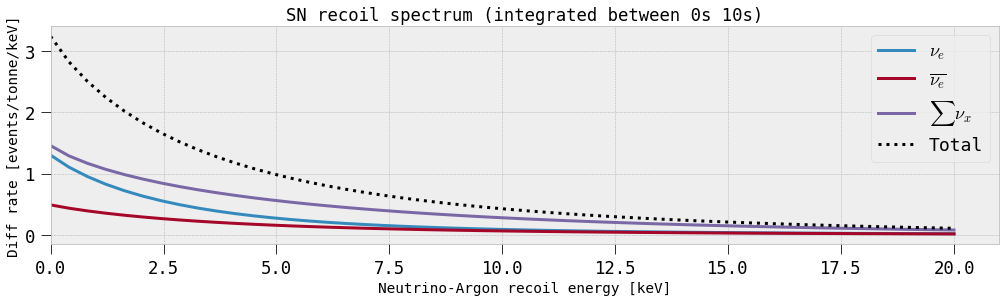

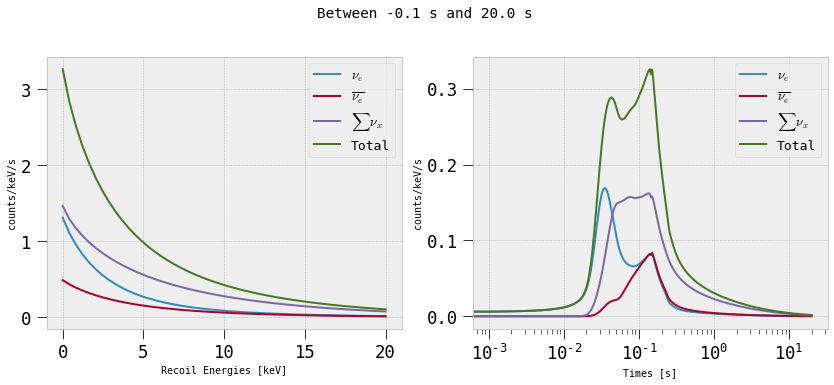

In [5]:
plotter.plot_recoil_spectra();
plt.savefig('testArgon recoil spectrum' + M30sn_model.name + '.pdf',bbox_inches='tight')
plotter.plot_recoil_spectra2D(integrated=True, figsize=(14,5));
plt.savefig('Argon recoil spectrum2D' + M30sn_model.name + '.pdf',bbox_inches='tight')

#### Sample from 1D spectrum

In [ ]:
fig, ax, samples = plotter.plot_sampled_energies()

#### Sample from 2D spectra

In [ ]:
plotter.plot_sampled_energies(x='time', xscale='log');

In [ ]:
fig, ax, _ = plotter.plot_sampled_energies(x='time', xscale='log');

#### Object attributes

In [ ]:
tot_rates1D = M30sn_model.total_rate1D # integrated(summed) between 0-10s 
tot_rates2D = M30sn_model.total_rate2D
recoil_energy_bins = M30sn_model.recoil_en
timebins = M30sn_model.t
nu_energies = M30sn_model.mean_E
rates_Er, rates_t = M30sn_model._get_1Drates_from2D()
Er_sample_E = M30sn_model.sample_from_recoil_spectrum(N_sample=100000)
Er_sample_t = M30sn_model.sample_from_recoil_spectrum(x='time',N_sample=100000)

### Signal at the Detector

In [ ]:
from snx.Simulate_Signal import Simulator
simulator = Simulator('test')

In [ ]:
sampled_energies = M30sn_model.sample_from_recoil_spectrum(N_sample=50000)
simulator.simulate_quanta(sampled_energies, plot=True);

In [ ]:
simulator.Plot_S1S2(sampled_energies);

See **Luminosity plots** and **Number Flux Plots** in the [previous notebook](Supernova_Signal-1.ipynb)